In [1]:
import myLib
import numpy as np
import math
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
# Getting all the matrices for the questions

# Q1

# LU Decomposition
A1 = myLib.file_opener("Mat_A1.txt")
B1 = [[19],[2],[13],[-7],[-9],[2]]

# Creating Copies
A1t = deepcopy(A1)
B1t = deepcopy(B1)

# Q2
A2 = myLib.file_opener("Mat_A2.txt")
B2 = [[-5/3],[2/3],[3],[-4/3],[-1/3],[5/3]]
A2t = deepcopy(A2)
B2t = deepcopy(B2)

In [3]:
# Q1
myLib.luDecompose(A1t)
myLib.forwardBackwardSubstitution(A1t,B1t)
ans11 = deepcopy(B1t)

# Resetting the matrices
A1t = deepcopy(A1)
B1t = deepcopy(B1)
myLib.gaussJordan(A1t, B1t)
ans12 = deepcopy(B1t)
print(ans11,ans12)

[[-1.761817043997862], [0.8962280338740133], [4.051931404116158], [-1.6171308025395421], [2.041913538501913], [0.15183248715593525]] [[-1.7618170439978567], [0.8962280338740136], [4.051931404116157], [-1.6171308025395428], [2.041913538501914], [0.15183248715593495]]


In [7]:
# Q2
myLib.luDecompose(A2t)
myLib.forwardBackwardSubstitution(A2t,B2t)
ans21 = deepcopy(B2t)

# Resetting the matrices
A2t = deepcopy(A2)
B2t = deepcopy(B2)
ans22 = myLib.JacobiInv(A2t,B2t,x=None, tol = 10**(-4))

# Resetting the matrices
A2t = deepcopy(A2)
res23, ans23 = myLib.Inverse(A2t,xsolvername = "JacobiInv",tols = 1e-4, residue_lists = True)

# Resetting the matrices
A2t = deepcopy(A2)
res24, ans24 = myLib.Inverse(A2t,xsolvername = "Gauss-Seidel",tols = 1e-4, residue_lists = True)

# Resetting the matrices
A2t = deepcopy(A2)
res25, ans25 = myLib.Inverse(A2t,xsolvername = "ConjugateGrad", tols = 1e-4, residue_lists = True)

In [5]:
print(ans23,ans24,ans25)

[[0.93490644 0.86991763 0.25956983 0.20759851 0.41541074 0.16862289]
 [0.28993763 0.57999184 0.17304656 0.13844168 0.27694049 0.11246114]
 [0.08654205 0.17310924 0.32030542 0.05623057 0.11251243 0.10817512]
 [0.20759851 0.41541074 0.16862289 0.93490644 0.86991763 0.25956983]
 [0.13844168 0.27694049 0.11246114 0.28993763 0.57999184 0.17304656]
 [0.05623057 0.11251243 0.10817512 0.08654205 0.17310924 0.32030542]] [[0.92198926 0.85840923 0.24567971 0.19709903 0.4059948  0.15733333]
 [0.28420782 0.57485497 0.16688531 0.13375434 0.27277561 0.10742101]
 [0.08447958 0.17127691 0.31808767 0.05455848 0.11101313 0.10637717]
 [0.19709903 0.4059948  0.15733333 0.92631173 0.86228245 0.25032796]
 [0.13375434 0.27277561 0.10742101 0.28613641 0.57658374 0.16895916]
 [0.05455848 0.11101313 0.10637717 0.08517372 0.17189922 0.31883408]] [[ 0.9331789   0.86431894 -1.77902756  0.20298637  0.41516288  2.22280287]
 [ 0.28960923  0.57644805 -0.3801171   0.13683057  0.27528056  0.72842444]
 [ 0.08638174  0.170

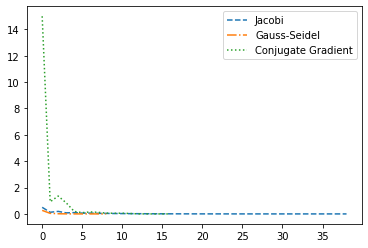

In [8]:
plt.plot(res23, '--', label = "Jacobi")
plt.plot(res24, '-.', label = "Gauss-Seidel")
plt.plot(res25[:35], ':', label = "Conjugate Gradient")
plt.legend()
plt.show()

In [9]:
# Conjugate Gradient function to find solution x
def FuncConjGrad(f,b,N,x = None, tol = 1e-4, max_iter = 100, residue_list = False):
    n = N*N
    if x is None: x = np.ones(n)

    r = b - f_dot(f,x)
    d = deepcopy(r)
    rl = []
    count = 0
    while (np.dot(r,r)>tol and count<max_iter):

        rn = np.dot(r,r)
        rl.append(rn)       # Appending the residue value

        a = (rn)/(np.dot(d,f_dot(f,d)))
        x += a*d
        r -= a*f_dot(f,d)

        b = np.dot(r,r)/rn
        d = r + b*d
        count += 1
    if(residue_list == True): return rl, x
    return x, rl

def f_dot(f,v):
    x = np.zeros(len(v))
    for i in range(len(v)):
        for j in range(len(v)):
            x[i] += f(i,j,N)*v[j]
    return x

In [10]:
def Func_M(x,y, N, m = 0.2):
    # Creating lattice coordinates from lattice numbers
    i1 = x%N
    j1 = x//N
    i2 = y%N
    j2 = y//N

    # Condition for diagonal term
    if (x==y): return (m**2-1)

    # Condition for interaction terms
    if(((i1+1)%N,j1)==(i2,j2)): return 0.5
    if(((i1-1)%N,j1)==(i2,j2)): return 0.5
    if((i1,(j1+1)%N)==(i2,j2)): return 0.5
    if((i1,(j1-1)%N)==(i2,j2)): return 0.5

    return 0

In [11]:
N = 20
n = N*N
I = np.eye(n)
Inv3 = np.zeros((n,n))

resl = []
for i in range(n):
    res, inv = FuncConjGrad(Func_M, I[i],N, tol = 1e-4, max_iter = 20 ,residue_list = True)
    print("iteration done: ",i)
    Inv3[:,i] = inv
    if(i == 0): resl = res

iteration done:  0
iteration done:  1
iteration done:  2
iteration done:  3
iteration done:  4
iteration done:  5
iteration done:  6
iteration done:  7
iteration done:  8
iteration done:  9
iteration done:  10
iteration done:  11
iteration done:  12
iteration done:  13
iteration done:  14
iteration done:  15
iteration done:  16
iteration done:  17
iteration done:  18
iteration done:  19
iteration done:  20
iteration done:  21
iteration done:  22
iteration done:  23
iteration done:  24
iteration done:  25
iteration done:  26
iteration done:  27
iteration done:  28
iteration done:  29
iteration done:  30
iteration done:  31
iteration done:  32
iteration done:  33
iteration done:  34
iteration done:  35
iteration done:  36
iteration done:  37
iteration done:  38
iteration done:  39
iteration done:  40
iteration done:  41
iteration done:  42
iteration done:  43
iteration done:  44
iteration done:  45
iteration done:  46
iteration done:  47
iteration done:  48
iteration done:  49
iteration 

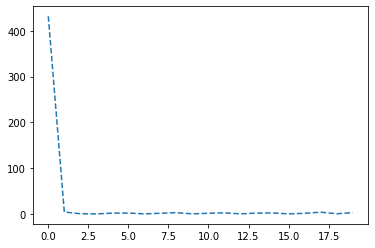

In [13]:
plt.plot(resl,'--')

In [14]:
import csv
with open("Q3_inv_sol.csv","w+") as my_csv:
    csvwriter = csv.writer(my_csv,delimiter=",")
    csvwriter.writerows(Inv3)